In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1) Simulation of Markov Processes

### Part a)

The following matrix represents the transition probabilities for the figure given in the problem set document

$\begin{equation}
    \begin{bmatrix}
    0.2 & 0.7 & 0.1 \\
    0.2 & 0.5 & 0.3 \\ 
    0.2 & 0.4 & 0.4 \\
    \end{bmatrix}
\end{equation}$

and setting up a numpy array

In [3]:
mark_arr = np.array(
    [
        [0.2, 0.7, 0.1],
        [0.2, 0.5, 0.3],
        [0.2, 0.4, 0.4],
    ]
)

### Part b)

The following function accept a matrix representing a Markov process and some input vector of probabilities and returns the resulting vector after the Markov process is applied.
The code is effectively calculating the following equation using numpy

$\begin{equation}
    {\pi_{t+1}}^\top = {\pi_t}^\top X
\end{equation}$

In [77]:
def markov_step_single(pi_0, arr_P):
    """TODO"""
    return np.random.choice([1, 2, 3], p=pi_0.T @ arr_P)


def markov_step_arbitrary(pi_0, arr_P, n):
    """TODO"""
    return pi_0.T @ np.linlag.matrix_power(arr_P, n)


a = np.array([1, 0, 0])
print(a, "->", markov_step_single(pi_0=a, arr_P=mark_arr))

b = np.array([0, 1, 0])
print(b, "->", markov_step_single(pi_0=b, arr_P=mark_arr))

c = np.array([0, 0, 1])
print(c, "->", markov_step_single(pi_0=c, arr_P=mark_arr))

[1 0 0] -> 2
[0 1 0] -> 2
[0 0 1] -> 2


# Problem 2) Stationary Distributions

### Part a)

Here, the stationary state $\pi_\infty$ for the above Markov processes is calculated analytically and the solutions checked against numerical computation.
The stationary state $\pi_\infty$ is one of eigenvectors to the matrix $P$ representing the Markov process, so solving the following equation, we have
$\begin{align}
    {\pi_\infty}^\top \left(P - \mathbb{I}\right) = 0 &\implies \begin{bmatrix} \pi_0 & \pi_1 & \pi_2 \end{bmatrix} \begin{bmatrix}     0.2 & 0.7 & 0.1 \\       0.2 & 0.5 & 0.3 \\          0.2 & 0.4 & 0.4 \\ \end{bmatrix} = 0 \\
    &\implies \begin{cases} 
        0.2 \pi_0 + 0.2 \pi_1 + 0.2 \pi_2 &= 0\\ 
        0.7 \pi_0 + 0.5 \pi_1 + 0.4 \pi_2 &= 0\\ 
        0.1 \pi_0 + 0.3 \pi_1 + 0.4 \pi_2 &= 0\\ 
    \end{cases} \\
    &\implies \begin{cases} 
        \pi_0 + \pi_1 + \pi_2 &= 0\\ 
        7 \pi_0 + 5 \pi_1 + 4 \pi_2 &= 0\\ 
        \pi_0 + 3 \pi_1 + 4 \pi_2 &= 0\\ 
    \end{cases} \\
    &\implies \begin{cases} 
        \pi_0 &= \frac{1}{5} \\
        \pi_1 &= \frac{23}{45} \\
        \pi_2 &= \frac{13}{45} \\
    \end{cases} 
\end{align}$
which are the fractional equivalents to the float values computed below.

### Part b)

The code below simulates the convergence to the stationary state over 20 steps and generates the requested plots.
The analytical stationary state agrees with the state reached by the simulation.

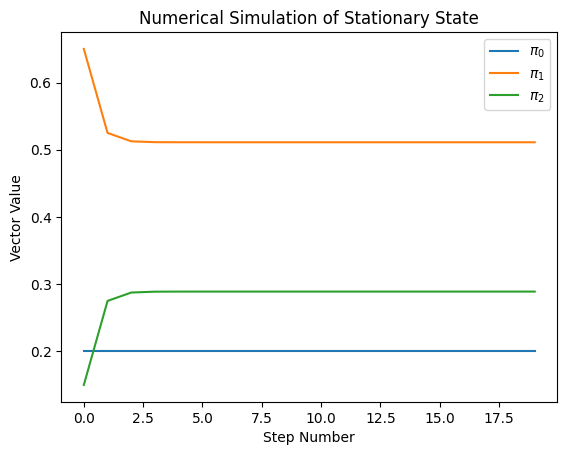

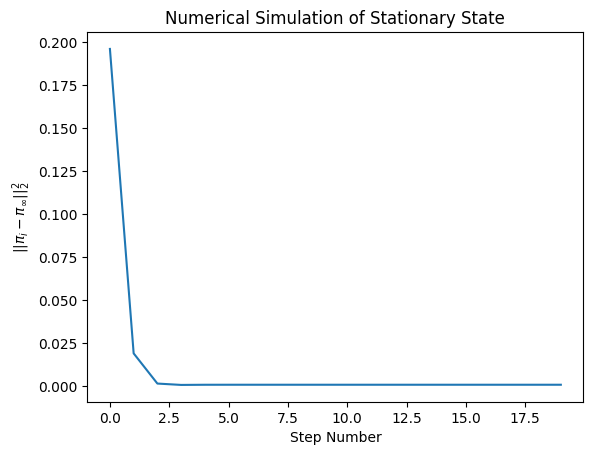

Stationary State: [0.2        0.51111111 0.28888889]


In [139]:
true_stat_state = np.array([])
all_pis = []

pi = np.array([0.8, 0.1, 0.1])
for _ in range(20):
    pi = pi.T @ mark_arr
    all_pis.append(pi)

all_pis = np.asarray(all_pis).T
# all_pis
plt.plot(all_pis[0], label="$\pi_0$")
plt.plot(all_pis[1], label="$\pi_1$")
plt.plot(all_pis[2], label="$\pi_2$")
plt.legend()
plt.xlabel("Step Number")
plt.ylabel("Vector Value")
plt.title("Numerical Simulation of Stationary State")
plt.show()

plt.plot(np.linalg.norm(np.array([0.2, 0.511,  0.288])[:, np.newaxis] - all_pis, axis=0))
plt.xlabel("Step Number")
plt.ylabel(r"$\vert\vert \pi_i - \pi_{\infty} \vert\vert^2_2$")
plt.title("Numerical Simulation of Stationary State")
plt.show()


print("Stationary State:", all_pis[:, -1])

# Problem 3) Absorbing State

### Part a)
Below is code which simulates waiting time until reaching state 3, at which point the simulation ends.

In [169]:
def calc_waiting_time(pi0, X0, P):
    MAX_ITER = 10000
    waiting_time = 0
    while X0 != 3 and waiting_time < MAX_ITER:
        waiting_time += 1
        pi0 = pi0.T @ P
        X0 = np.random.choice([1, 2, 3], p=pi0)
    
    return waiting_time

# For X_0 = 1
waiting_times_1 = [
    calc_waiting_time(pi0=np.array([1, 0, 0]), X0=1, P=mark_arr)
    for _ in range(500000)
]


# # For X_0 = 2
waiting_times_2 = [
    calc_waiting_time(pi0=np.array([0, 1, 0]), X0=2, P=mark_arr)
    for _ in range(500000)
]

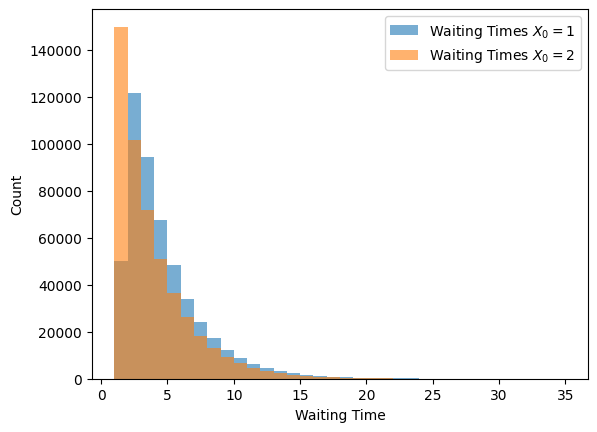

Mean Arrival Time X_1: 4.179618
Mean Arrival Time X_1: 3.419418


In [170]:
plt.hist(waiting_times_1, alpha=0.6, label="Waiting Times $X_0=1$", bins=np.arange(35) + 1)
plt.hist(waiting_times_2, alpha=0.6, label="Waiting Times $X_0=2$", bins=np.arange(35) + 1)
plt.legend()
# plt.xscale("log")
# plt.yscale("log")
plt.xlabel("Waiting Time")
plt.ylabel("Count")
plt.show()

print("Mean Arrival Time X_1:", np.mean(waiting_times_1))
print("Mean Arrival Time X_1:", np.mean(waiting_times_2))

### Part b)

Here, the theoretical mean arrival time to state 3 is calculated via

$\begin{equation}
    \mu_i = 1 + \sum_{j=1}^{3}p_{ij}\mu_j
\end{equation}$
where the expected arrival time to state 3 is $\mathbb{E}[T_i] = \mu_i$ where the initial state is $i$.


$\mu_1 = 1 + \left(\ 0.2\mu_1 + 0.2\mu_2 + 0.2\mu_3 \right)$

and

$\mu_2 = 1 + \left(\ 0.7\mu_1 + 0.5\mu_2 + 0.4\mu_3 \right)$

and

$\mu_3 = \mathbb{E}[T_3] = 0$

so
$\begin{equation}
    \begin{cases}
        \mu_1 = 1 + \frac{1}{5}\mu_1 + \frac{1}{5}\mu_2 \\
        \mu_2 = 1 + \frac{7}{10}\mu_1 + \frac{1}{2}\mu_2
    \end{cases}
    \implies
    \begin{cases}
        -10 = -8\mu_1 +  7\mu_2 \\
        -10 =  2\mu_1 + -5\mu_2
    \end{cases}
\end{equation}$
meaning that
$\begin{equation}
    \begin{cases}
        \mathbb{E}[T_1] = \mu_1 = \frac{60}{13} \\
        \mathbb{E}[T_2] = \mu_2 = \frac{50}{13}
    \end{cases}
\end{equation}$
which is relatively close to the numerically calculated waiting times.